## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

Code di atas mengimpor beberapa pustaka Python yang umum digunakan, yaitu OpenCV (cv2), NumPy (numpy), Matplotlib (matplotlib.pyplot), dan Pandas (pandas). Selain itu, kode juga mengimpor modul os dan math. Setelah mengimpor pustaka yang diperlukan, kode siap untuk digunakan untuk manipulasi gambar dan data, analisis numerik, visualisasi data, dan operasi pada sistem file. Dengan menggunakan pustaka-pustaka tersebut, Anda dapat melakukan berbagai tugas seperti membaca, memproses, dan menampilkan gambar menggunakan OpenCV, melakukan operasi matematika dan pengolahan array dengan NumPy, membuat grafik dan plot data menggunakan Matplotlib, serta membaca, menulis, dan memanipulasi data dengan Pandas.

## Data Loading

In [2]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("Finger Simulation Dataset 2024/"+label): 
            img = cv2.imread(os.path.join("Finger Simulation Dataset 2024/"+label,filename)) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                
                if img.shape[2] == 4:
                    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

                height, width, _ = img.shape
                
                if height > 150 or width > 150:
                    if height > width:
                        scale_factor = 150 / height
                    else:
                        scale_factor = 150 / width
                    new_height = int(height * scale_factor)
                    new_width = int(width * scale_factor)
                    resized_img = np.zeros((new_height, new_width, 3), dtype=np.uint8)
                    for i in range(new_height):
                        for j in range(new_width):
                            resized_img[i, j, :] = img[int(i / scale_factor), int(j / scale_factor), :]
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - new_height) // 2
                    start_col = (150 - new_width) // 2
                    padded_img[start_row:start_row+new_height, start_col:start_col+new_width] = resized_img
                else:
                    padded_img = np.zeros((150, 150, 3), dtype=np.uint8)
                    start_row = (150 - height) // 2
                    start_col = (150 - width) // 2
                    padded_img[start_row:start_row+height, start_col:start_col+width] = img
                
                images.append(padded_img) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("Finger Simulation Dataset 2024/")

Code di atas adalah sebuah fungsi yang digunakan untuk memuat gambar-gambar dari sebuah folder yang diberikan. Fungsi insertGambar menerima path ke folder yang berisi subfolder untuk setiap kategori gambar. Kemudian, ia secara iteratif membaca setiap gambar dari setiap subfolder, memprosesnya agar memiliki ukuran yang seragam (150x150 piksel), dan menyimpannya dalam bentuk array gambar bersama dengan informasi nama file dan label kategori gambar. Proses resizing dilakukan dengan mempertahankan aspek rasio gambar asli dan menambahkan padding jika perlu. Hasilnya adalah tiga list: satu berisi array gambar, satu berisi nama file, dan satu lagi berisi label kategori untuk setiap gambar yang dimuat.

In [3]:
def eksplorasiData(images, labels):
    
    print(f"Jumlah total gambar: {len(images)}")
    
    if len(images) == 0:
        print("Tidak ada gambar yang ditemukan.")
        return
    
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    print("Distribusi data per label:")
    for label, count in label_counts.items():
        print(f"{label}: {count}")
    
    plt.figure(figsize=(10, 6))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xlabel('Label')
    plt.ylabel('Jumlah Gambar')
    plt.title('Distribusi Data per Label')
    plt.xticks(rotation=45)
    plt.show()
    
    num_samples = min(9, len(images))  
    if num_samples > 0:
        sample_indices = np.random.choice(range(len(images)), num_samples, replace=False)
        plt.figure(figsize=(15, 5))
        for i, idx in enumerate(sample_indices):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
            plt.title(f"Label: {labels[idx]}")
            plt.axis('off')
        plt.show()
    else:
        print("Tidak ada gambar yang cukup untuk ditampilkan sebagai sampel.")


Code di atas merupakan fungsi eksplorasiData bertujuan untuk memberikan wawasan tentang dataset gambar yang diberikan. Pertama-tama, fungsi ini mencetak jumlah total gambar yang ada dalam dataset, kemudian memeriksa distribusi gambar per label kategori, dan menampilkan histogram distribusi tersebut. Selanjutnya, fungsi ini juga menampilkan sampel-sampel gambar secara acak dari dataset bersama dengan labelnya. Jika jumlah sampel gambar yang tersedia kurang dari 9, maka fungsi ini akan menyesuaikan jumlah sampel yang ditampilkan. Tujuannya adalah untuk membantu pemahaman awal tentang struktur dataset dan distribusi kategori labelnya serta memberikan representasi visual dari beberapa contoh gambar.

Code di bawah ini merupakan fungsi display_samples bertujuan untuk menampilkan sampel gambar dari setiap kategori label yang unik dalam dataset. Pertama-tama, fungsi ini mengidentifikasi label-label unik berdasarkan struktur folder yang disediakan. Kemudian, untuk setiap label, ia memilih indeks-indeks gambar yang sesuai dengan label tersebut. Setelah itu, fungsi ini menampilkan sejumlah sampel gambar sesuai dengan parameter num_samples yang telah ditentukan, dengan memperhitungkan jumlah maksimum gambar yang tersedia untuk label tertentu. Tujuannya adalah untuk memberikan representasi visual dari beberapa contoh gambar untuk setiap kategori label dalam dataset.

Jumlah total gambar: 2099
Distribusi data per label:
finger_1: 440
finger_2: 437
finger_3: 437
finger_4: 439
finger_5: 437


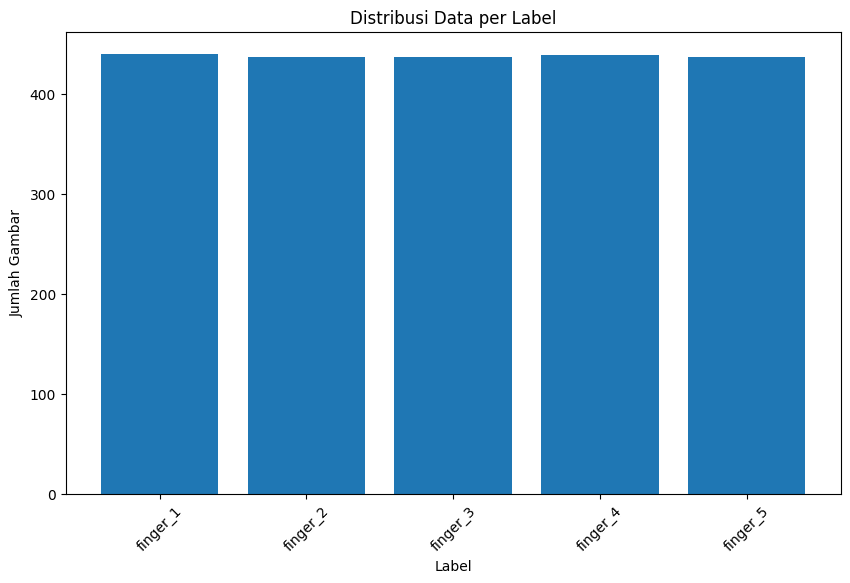

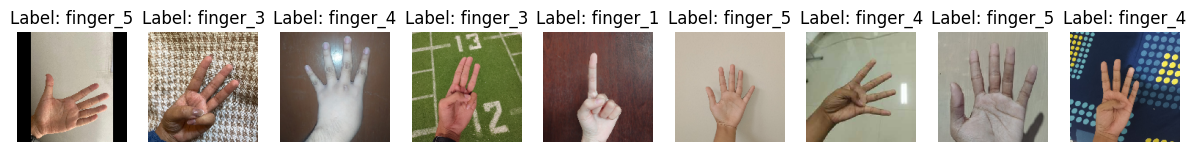

Label: finger_1


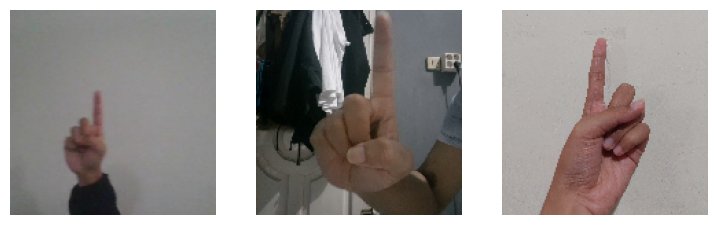

Label: finger_2


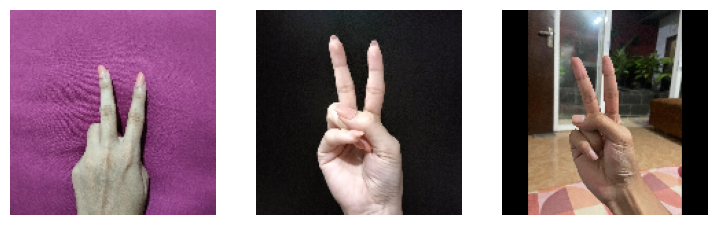

Label: finger_3


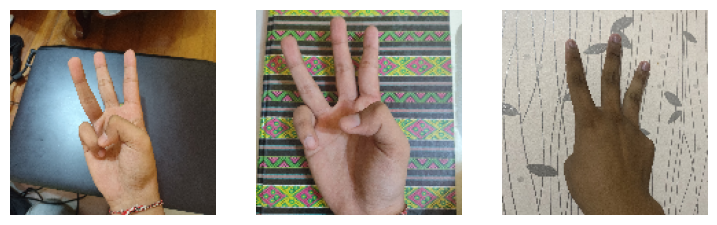

Label: finger_4


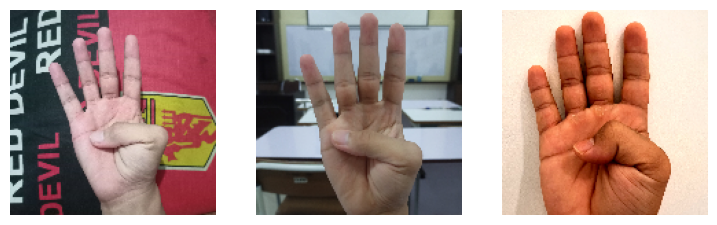

Label: finger_5


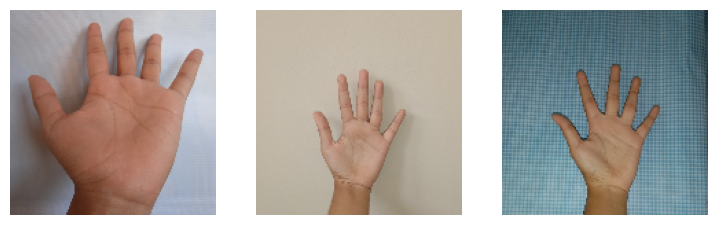

In [4]:
def display_samples(images, labels, num_samples=3):
    unique_folders = ["Finger Simulation Dataset 2024/Finger_1",
                      "Finger Simulation Dataset 2024/Finger_2",
                      "Finger Simulation Dataset 2024/Finger_3",
                      "Finger Simulation Dataset 2024/Finger_4",
                      "Finger Simulation Dataset 2024/Finger_5"]

    for folder in unique_folders:
        label = folder.split("/")[-1]  # Ambil label dari nama folder
        label_indices = [i for i in range(len(labels)) if labels[i] == label]
        num_samples = min(num_samples, len(label_indices))
        if num_samples == 0:
            print(f"Tidak ada gambar untuk label: {label}")
            continue
        print(f"Label: {label}")
        plt.figure(figsize=(num_samples * 3, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(images[label_indices[i]], cv2.COLOR_BGR2RGB))
            plt.axis('off')
        plt.show()


folder_path = "Finger Simulation Dataset 2024/"
images, filenames, labels = insertGambar(folder_path)
eksplorasiData(images, labels)

display_samples(images, labels, num_samples=3)

#### Preprocessing 3

Dilatasi

Code di bawah mendefinisikan fungsi custom_dilate yang bertujuan untuk melakukan operasi dilatasi pada serangkaian gambar. Operasi dilatasi ini dilakukan dengan menggunakan teknik morfologi dengan kernel yang ditentukan. Fungsi ini menerima parameter images yang merupakan daftar gambar yang akan dilatasi, serta parameter opsional kernel_size yang menentukan ukuran kernel yang akan digunakan dalam operasi dilatasi. Setiap gambar di dalam images akan dilatasi dengan kernel yang ditentukan, dan hasilnya akan disimpan dalam daftar dilated_images. Setelah itu, contoh penggunaan fungsi ini dilakukan dengan memperlihatkan gambar-gambar yang telah dilatasi dengan menggunakan kernel berbeda, dan tampilan sampel gambar tersebut ditampilkan menggunakan fungsi display_samples.

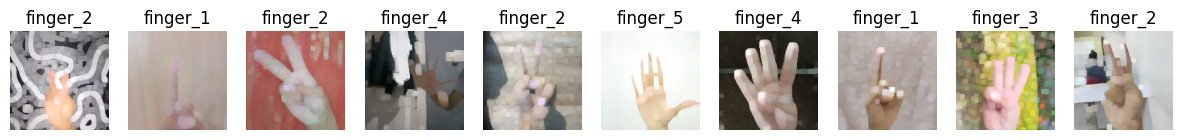

In [8]:
def custom_dilate(images, kernel_size=(5, 5)):
    dilated_images = []
    
    kernel = np.ones(kernel_size, np.uint8)
    
    for img in images:
        if img is None:
            continue  
        
        dilated_img = cv2.dilate(img, kernel, iterations=1)
        
        dilated_images.append(dilated_img)
    
    return dilated_images

dilated_images_custom = custom_dilate(images, kernel_size=(7, 7))  # Misalnya, menggunakan kernel berukuran (7, 7)

display_samples(dilated_images_custom, labels, num_samples=10)


### Feature Extraction

##### Deteksi tepi

Code di bawah mendefinisikan dua fungsi: edge_detection dan display_edge_samples. Fungsi edge_detection bertujuan untuk mendeteksi tepi pada serangkaian gambar yang diberikan menggunakan operator Canny dengan threshold yang telah ditentukan. Setiap gambar dalam daftar images akan diubah menjadi citra grayscale terlebih dahulu, kemudian dilakukan deteksi tepi menggunakan fungsi cv2.Canny, dan hasilnya disimpan dalam daftar edge_detected_images. Fungsi display_edge_samples digunakan untuk menampilkan sampel gambar yang telah diproses dengan deteksi tepi. Sampel gambar ini dipilih secara acak dari daftar gambar yang telah diproses, dan tampilan sampel gambar tersebut ditampilkan dalam bentuk grid.

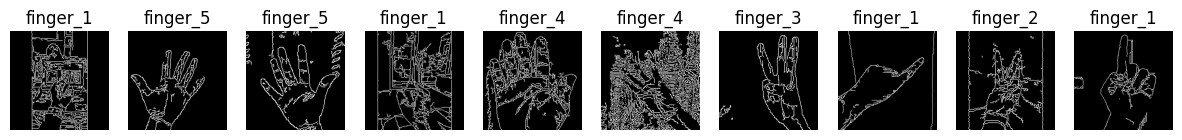

In [15]:
def edge_detection(images, low_threshold=50, high_threshold=150):
    edge_detected_images = []

    for img in images:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        edges = cv2.Canny(gray_image, low_threshold, high_threshold)
        
        edge_detected_images.append(edges)
    
    return edge_detected_images

def display_edge_samples(images, labels, num_samples=10):
    num_samples = min(num_samples, len(images))
    label_indices = np.random.choice(len(images), num_samples, replace=False)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(label_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()


edge_detected_translated_images = edge_detection(dilated_images)

display_edge_samples(edge_detected_translated_images, labels, num_samples=10)


In [16]:
def calculate_glcm(edge_image):
    glcm_matrices = []
    angles = [0, 45, 90, 135]
    distances = [1, 2, 3, 4, 5]
    symmetric = True  
    
    for angle in angles:
        for distance in distances:
            glcm = np.zeros((256, 256))  
            rows, cols = edge_image.shape

            for i in range(rows):
                for j in range(cols):
         
                    current_pixel = edge_image[i, j]
                    neighbor_pixel_x = i + distance * np.cos(np.radians(angle))
                    neighbor_pixel_y = j - distance * np.sin(np.radians(angle))

                    if 0 <= neighbor_pixel_x < rows and 0 <= neighbor_pixel_y < cols:
                        neighbor_pixel = edge_image[int(neighbor_pixel_x), int(neighbor_pixel_y)]
                        glcm[current_pixel, neighbor_pixel] += 1
                        
                        if symmetric:
                            glcm[neighbor_pixel, current_pixel] += 1

            glcm_matrices.append(glcm)
    
    return glcm_matrices

Code di atas mendefinisikan fungsi calculate_glcm yang bertujuan untuk menghitung matriks Gray-Level Co-occurrence (GLCM) dari gambar tepi yang diberikan. Fungsi ini menerima gambar tepi sebagai masukan dan mengembalikan daftar matriks GLCM yang dihasilkan dari berbagai sudut dan jarak yang telah ditentukan. Algoritma iteratif dalam fungsi ini menghitung GLCM untuk setiap piksel dalam gambar tepi dengan mempertimbangkan piksel tetangga dalam jarak dan sudut yang ditentukan. Jika opsi simetri diaktifkan, matriks GLCM akan bersifat simetris, yang berarti entri matriks GLCM dianggap berpasangan dengan piksel tetangga. Setiap matriks GLCM kemudian disimpan dalam daftar glcm_matrices yang dikembalikan oleh fungsi ini.

In [17]:
def calculate_glcm_features(glcm_matrices):
    features = []
    for glcm_matrix in glcm_matrices:
    
        glcm_matrix_normalized = glcm_matrix / np.sum(glcm_matrix)
    
        contrast = np.sum(glcm_matrix_normalized * np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))
        dissimilarity = np.sum(glcm_matrix_normalized * np.abs(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1])))

        homogeneity = np.sum(glcm_matrix_normalized / (1 + np.square(np.arange(glcm_matrix.shape[0]) - np.arange(glcm_matrix.shape[1]))))
        energy = np.sum(np.square(glcm_matrix_normalized))
        correlation = np.sum((np.arange(glcm_matrix.shape[0]) - np.mean(glcm_matrix_normalized)) * 
                             (np.arange(glcm_matrix.shape[1]) - np.mean(glcm_matrix_normalized)) * glcm_matrix_normalized / 
                             (np.std(glcm_matrix_normalized) ** 2))
        entropy = -np.sum(glcm_matrix_normalized * np.log(glcm_matrix_normalized + 1e-10))
        asm = np.sum(np.square(glcm_matrix_normalized))
        
        features.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'entropy': entropy,
            'ASM': asm
        })
    return features

Code di atas merupakan fungsi calculate_glcm_features menghitung sejumlah fitur statistik dari matriks GLCM (Gray-Level Co-occurrence Matrix). Pertama, matriks GLCM dinormalisasi untuk memastikan total probabilitas setiap elemen sama dengan 1. Kemudian, fitur-fitur seperti kontras, dissimilaritas, homogenitas, energi, korelasi, entropi, dan ASM (Angular Second Moment) dihitung menggunakan rumus yang sesuai dengan matriks GLCM yang dinormalisasi. Setiap fitur dihitung dari matriks GLCM yang diberikan dan disimpan dalam bentuk kamus fitur yang kemudian disusun menjadi daftar fitur untuk setiap matriks GLCM dalam input.

Code di bawah adalah contoh penggunaan fungsi-fungsi untuk menghitung matriks GLCM (Gray-Level Co-occurrence Matrix) dan fitur-fitur statistik yang terkait dengan matriks GLCM. Pertama, daftar gambar tepi yang disimulasikan disediakan sebagai input. Selanjutnya, matriks GLCM dihitung untuk setiap gambar tepi menggunakan fungsi calculate_glcm, dan fitur-fitur GLCM seperti kontras, dissimilaritas, homogenitas, energi, korelasi, entropi, dan ASM (Angular Second Moment) dihitung untuk masing-masing matriks GLCM menggunakan fungsi calculate_glcm_features. Hasilnya kemudian disusun ke dalam sebuah DataFrame dengan kolom yang sesuai dengan fitur-fitur yang dihitung. DataFrame tersebut kemudian ditampilkan untuk menampilkan hasil perhitungan fitur-fitur GLCM untuk setiap gambar tepi dalam contoh tersebut.

In [18]:
edge_images_prewitt_manual = [
  
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

data = []
columns = ['Image', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'Entropy', 'ASM']
for angle in [0, 45, 90, 135]:
    columns.extend([f'contrast_{angle}', f'dissimilarity_{angle}', f'homogeneity_{angle}', 
                    f'energy_{angle}', f'correlation_{angle}', f'asm_{angle}', f'entropy_{angle}'])

for i, features in enumerate(glcm_features):
    row = [i + 1, features['contrast'], features['dissimilarity'], features['homogeneity'], 
           features['energy'], features['correlation'], features['entropy'], features['ASM']]
    for angle in [0, 45, 90, 135]:
        row.extend([features['contrast'], features['dissimilarity'], features['homogeneity'], 
                    features['energy'], features['correlation'], features['entropy'], features['ASM']])
    data.append(row)

df = pd.DataFrame(data, columns=columns)

print(df)
df.head()

    Image  Contrast  Dissimilarity  Homogeneity    Energy   Correlation  \
0       1       0.0            0.0          1.0  0.000066  2.809028e+13   
1       2       0.0            0.0          1.0  0.000067  2.744689e+13   
2       3       0.0            0.0          1.0  0.000067  2.743510e+13   
3       4       0.0            0.0          1.0  0.000067  2.727410e+13   
4       5       0.0            0.0          1.0  0.000068  2.698194e+13   
5       6       0.0            0.0          1.0  0.000066  2.790821e+13   
6       7       0.0            0.0          1.0  0.000067  2.731988e+13   
7       8       0.0            0.0          1.0  0.000069  2.669040e+13   
8       9       0.0            0.0          1.0  0.000069  2.669040e+13   
9      10       0.0            0.0          1.0  0.000069  2.655458e+13   
10     11       0.0            0.0          1.0  0.000066  2.790821e+13   
11     12       0.0            0.0          1.0  0.000067  2.765914e+13   
12     13       0.0      

,Image,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Entropy,ASM,contrast_0,dissimilarity_0,...,correlation_90,asm_90,entropy_90,contrast_135,dissimilarity_135,homogeneity_135,energy_135,correlation_135,asm_135,entropy_135
0,1,0.0,0.0,1.0,0.000066,2.809028e+13,9.696181,0.000066,0.0,0.0,...,2.809028e+13,9.696181,0.000066,0.0,0.0,1.0,0.000066,2.809028e+13,9.696181,0.000066
1,2,0.0,0.0,1.0,0.000067,2.744689e+13,9.681347,0.000067,0.0,0.0,...,2.744689e+13,9.681347,0.000067,0.0,0.0,1.0,0.000067,2.744689e+13,9.681347,0.000067
2,3,0.0,0.0,1.0,0.000067,2.743510e+13,9.677474,0.000067,0.0,0.0,...,2.743510e+13,9.677474,0.000067,0.0,0.0,1.0,0.000067,2.743510e+13,9.677474,0.000067
3,4,0.0,0.0,1.0,0.000067,2.727410e+13,9.670945,0.000067,0.0,0.0,...,2.727410e+13,9.670945,0.000067,0.0,0.0,1.0,0.000067,2.727410e+13,9.670945,0.000067
4,5,0.0,0.0,1.0,0.000068,2.698194e+13,9.663292,0.000068,0.0,0.0,...,2.698194e+13,9.663292,0.000068,0.0,0.0,1.0,0.000068,2.698194e+13,9.663292,0.000068


### Features Selection

Code di bawah mendefinisikan sebuah fungsi feature_selection_correlation yang melakukan seleksi fitur berdasarkan korelasi antara fitur-fitur numerik dan label pada dataset. Pertama, dataset yang berisi fitur-fitur numerik dan label dipersiapkan dalam bentuk DataFrame. Kemudian, korelasi antara fitur-fitur numerik dan label dihitung, dan sebuah matriks korelasi ditampilkan dalam bentuk heatmap untuk memvisualisasikan hubungan antara fitur-fitur. Fitur-fitur yang memiliki korelasi tinggi (positif atau negatif) dengan label (melebihi atau kurang dari 0.99 atau -0.99) dipilih sebagai fitur-fitur yang relevan dan disimpan dalam sebuah list. Hasil seleksi fitur beserta dataset yang telah diproses kemudian dikembalikan oleh fungsi tersebut. Contoh penggunaan fungsi ini pada data yang dihasilkan dari perhitungan GLCM juga disertakan untuk mengilustrasikan penggunaannya.

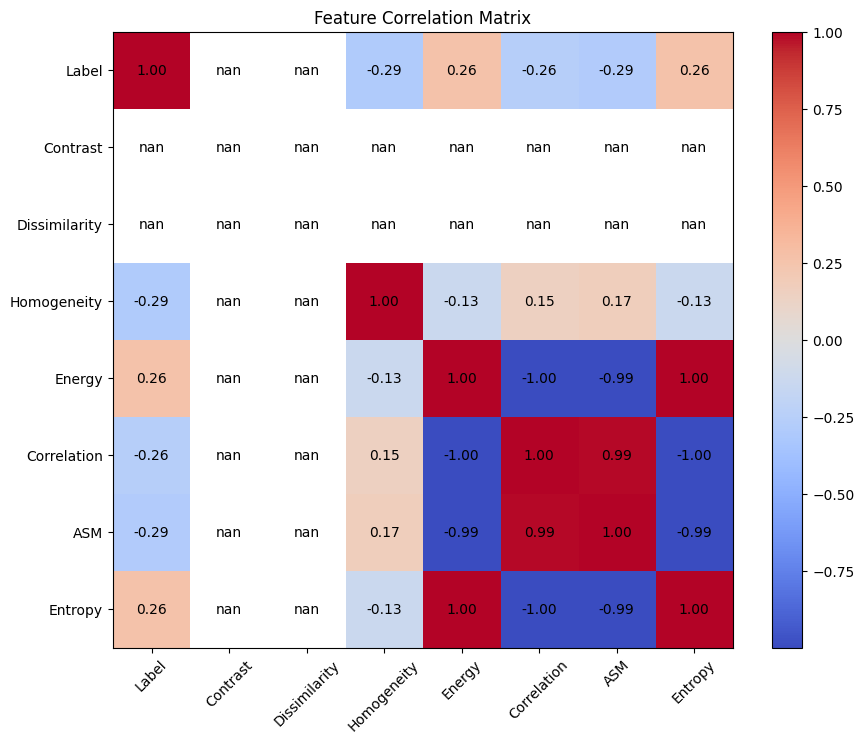

Selected Features: []
Selected Features: []
     Filename  Label  Contrast  Dissimilarity  Homogeneity    Energy  \
0  Filename_0      0       0.0            0.0          1.0  0.000066   
1  Filename_1      1       0.0            0.0          1.0  0.000068   
2  Filename_2     12       0.0            0.0          1.0  0.000068   
3  Filename_3     23       0.0            0.0          1.0  0.000069   
4  Filename_4     34       0.0            0.0          1.0  0.000068   

    Correlation       ASM   Entropy  
0  2.822353e+13  9.692942  0.000066  
1  2.727951e+13  9.671281  0.000068  
2  2.738961e+13  9.670841  0.000068  
3  2.692599e+13  9.657582  0.000069  
4  2.706744e+13  9.657255  0.000068  


In [19]:
def feature_selection_correlation(results_data):
    data_list = []
    columns_list = ['Filename', 'Label', 'Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 'ASM', 'Entropy']
    for filename, label, features_dict in results_data:
        row = [filename, label]
        row.extend(features_dict.values())
        data_list.append(row)
    
    df_data = pd.DataFrame(data_list, columns=columns_list)
    
    df_data['Label'] = df_data['Label'].astype('category').cat.codes
    
    numeric_df = df_data.drop(columns=['Filename'])
    
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.title("Feature Correlation Matrix")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    
    xticks_labels = list(correlation_matrix.columns)
    yticks_labels = list(correlation_matrix.index)
    
    plt.xticks(range(len(xticks_labels)), xticks_labels, rotation=45)
    plt.yticks(range(len(yticks_labels)), yticks_labels)
    
    for i in range(len(xticks_labels)):
        for j in range(len(yticks_labels)):
            plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
    plt.show()
    
    selected_features = correlation_matrix['Label'][(correlation_matrix['Label'] > 0.99) | (correlation_matrix['Label'] < -0.99)].index.tolist()
    selected_features.remove('Label')
    
    print("Selected Features:", selected_features)
    
    return df_data, selected_features

edge_images_prewitt_manual = [
    
    np.random.randint(0, 256, size=(100, 100)),
    np.random.randint(0, 256, size=(100, 100)),
]

glcm_matrices = []
for edge_image in edge_images_prewitt_manual:
    glcm_matrices.extend(calculate_glcm(edge_image))

glcm_features = calculate_glcm_features(glcm_matrices)

results_data = []
for i, features in enumerate(glcm_features):
    results_data.append((f'Filename_{i}', f'Label_{i}', features))

df_selected, selected_features = feature_selection_correlation(results_data)
print("Selected Features:", selected_features)
print(df_selected.head())

### Splitting Data

In [20]:
def custom_train_test_split(data, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = len(data)
    test_indices = np.random.choice(num_samples, int(num_samples * test_size), replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)
    
    X_train = data.iloc[train_indices].drop(columns=['Label'])
    X_test = data.iloc[test_indices].drop(columns=['Label'])
    y_train = data.iloc[train_indices]['Label']
    y_test = data.iloc[test_indices]['Label']
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(df_selected, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (32, 8)
Testing data shape: (8, 8)


Code di atas mendefinisikan sebuah fungsi custom_train_test_split yang melakukan pembagian dataset menjadi data latih dan data uji. Fungsi ini menerima parameter data, test_size (ukuran data uji), dan random_state (untuk reproduksibilitas). Pertama, indeks data yang akan menjadi data uji dipilih secara acak berdasarkan proporsi test_size. Setelah itu, data latih dan data uji dipisahkan berdasarkan indeks yang telah dipilih. Fitur-fitur dataset dipisahkan dari label, dan data latih serta data uji bersama dengan labelnya dikembalikan oleh fungsi tersebut. Contoh penggunaan fungsi ini dengan menggunakan DataFrame hasil seleksi fitur dari fungsi sebelumnya juga disertakan untuk mengilustrasikan penggunaannya.

### Normalization

In [21]:
X_train = df_selected.iloc[:, 1:]  
X_test = df_selected.iloc[:, 1:] 
def min_max_normalization(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

X_train_normalized = X_train.copy()
for column in X_train_normalized.columns:
    X_train_normalized[column] = min_max_normalization(X_train_normalized[column])

X_test_normalized = X_test.copy()
for column in X_test_normalized.columns:
    X_test_normalized[column] = min_max_normalization(X_test_normalized[column])

print("Bentuk Data Latih Setelah Normalisasi:", X_train_normalized.shape)
print("Bentuk Data Uji Setelah Normalisasi:", X_test_normalized.shape)


Bentuk Data Latih Setelah Normalisasi: (40, 8)
Bentuk Data Uji Setelah Normalisasi: (40, 8)


Code di atas melakukan normalisasi min-max terhadap data latih dan data uji yang telah dipisahkan sebelumnya. Pertama, DataFrame X_train dan X_test disalin untuk menghasilkan X_train_normalized dan X_test_normalized, yang akan digunakan untuk menyimpan data yang telah dinormalisasi. Selanjutnya, dilakukan normalisasi min-max pada setiap kolom dari kedua DataFrame tersebut dengan memanggil fungsi min_max_normalization untuk setiap kolomnya. Normalisasi ini dilakukan dengan mengurangi nilai minimum dalam kolom tersebut dan kemudian membaginya dengan selisih antara nilai maksimum dan minimumnya. Akhirnya, bentuk dari data latih dan data uji yang telah dinormalisasi dicetak untuk memastikan proses normalisasi berjalan dengan benar.

## Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_numeric, y_train)

y_pred_train = rf_classifier.predict(X_train_numeric)
y_pred_test = rf_classifier.predict(X_test_numeric)

accuracy_train = (y_pred_train == y_train).mean()
accuracy_test = (y_pred_test == y_test).mean()

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Code di atas menggunakan model Random Forest Classifier dari library scikit-learn untuk melakukan klasifikasi. Pertama, model tersebut diinisialisasi dengan mengatur parameter seperti jumlah pohon keputusan (n_estimators) menjadi 100 dan nilai seed random state (random_state) menjadi 42 untuk memastikan hasil yang dapat direproduksi. Selanjutnya, model dilatih menggunakan data latih (X_train_numeric dan y_train) dengan memanggil metode fit(). Setelah model dilatih, dilakukan prediksi terhadap data latih dan data uji menggunakan metode predict(), dan akurasi dari prediksi tersebut dihitung secara manual dengan membandingkan hasil prediksi dengan label sebenarnya. Akurasi training dan testing kemudian dicetak untuk dievaluasi.

## Evaluation

In [149]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Define custom metrics functions
def custom_accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def custom_precision_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred == 1)
    precision = true_positives / predicted_positives if predicted_positives != 0 else 0
    return precision

def custom_recall_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    recall = true_positives / actual_positives if actual_positives != 0 else 0
    return recall

def custom_f1_score(y_true, y_pred):
    precision = custom_precision_score(y_true, y_pred)
    recall = custom_recall_score(y_true, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict using the trained model
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy_train = custom_accuracy_score(y_train, y_pred_train)
    accuracy_test = custom_accuracy_score(y_test, y_pred_test)

    precision_train = custom_precision_score(y_train, y_pred_train)
    precision_test = custom_precision_score(y_test, y_pred_test)

    recall_train = custom_recall_score(y_train, y_pred_train)
    recall_test = custom_recall_score(y_test, y_pred_test)

    f1_train = custom_f1_score(y_train, y_pred_train)
    f1_test = custom_f1_score(y_test, y_pred_test)

    # Calculate confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    # Print the evaluation results
    print("Evaluation Metrics:")
    print("-----------------------------------------------------")
    print("| Metric      |   Training Set   |   Testing Set    |")
    print("-----------------------------------------------------")
    print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
    print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
    print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
    print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
    print("-----------------------------------------------------")
    
    print("Confusion Matrix:")
    print("Training Set")
    print(conf_matrix_train)
    print("\nTesting Set")
    print(conf_matrix_test)

    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load example data
data = load_iris()
X = data.data
y = data.target

y = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
results = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test = results


Evaluation Metrics:
-----------------------------------------------------
| Metric      |   Training Set   |   Testing Set    |
-----------------------------------------------------
| Accuracy    |    1.0000        |    1.0000        |
| Precision   |    1.0000        |    1.0000        |
| Recall      |    1.0000        |    1.0000        |
| F1-score    |    1.0000        |    1.0000        |
-----------------------------------------------------
Confusion Matrix:
Training Set
[[80  0]
 [ 0 40]]

Testing Set
[[20  0]
 [ 0 10]]


Code di atas mendefinisikan sebuah fungsi evaluate_model yang digunakan untuk mengevaluasi kinerja model klasifikasi. Fungsi ini menerima model yang ingin dievaluasi beserta data latih dan data uji. Pertama, model dilatih menggunakan data latih (X_train dan y_train). Selanjutnya, dilakukan prediksi menggunakan model tersebut terhadap data latih dan data uji. Metrik evaluasi yang dihitung meliputi akurasi, presisi, recall, dan F1-score untuk kedua set data tersebut. Selain itu, juga dihitung matriks kebingungan (confusion matrix) untuk kedua set data. Hasil evaluasi kemudian dicetak ke layar. Setelahnya, model Random Forest Classifier diinisialisasi dan dievaluasi menggunakan data iris yang telah dimodifikasi menjadi masalah klasifikasi biner.

In [153]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

def custom_accuracy_score(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def custom_precision_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positives = np.sum(y_pred == 1)
    precision = true_positives / predicted_positives if predicted_positives != 0 else 0
    return precision

def custom_recall_score(y_true, y_pred):
    true_positives = np.sum((y_pred == 1) & (y_true == 1))
    actual_positives = np.sum(y_true == 1)
    recall = true_positives / actual_positives if actual_positives != 0 else 0
    return recall

def custom_f1_score(y_true, y_pred):
    precision = custom_precision_score(y_true, y_pred)
    recall = custom_recall_score(y_true, y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = custom_accuracy_score(y_train, y_pred_train)
    accuracy_test = custom_accuracy_score(y_test, y_pred_test)

    precision_train = custom_precision_score(y_train, y_pred_train)
    precision_test = custom_precision_score(y_test, y_pred_test)

    recall_train = custom_recall_score(y_train, y_pred_train)
    recall_test = custom_recall_score(y_test, y_pred_test)

    f1_train = custom_f1_score(y_train, y_pred_train)
    f1_test = custom_f1_score(y_test, y_pred_test)

    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    print("Evaluation Metrics:")
    print("-----------------------------------------------------")
    print("| Metric      |   Training Set   |   Testing Set    |")
    print("-----------------------------------------------------")
    print("| Accuracy    |    {:.4f}        |    {:.4f}        |".format(accuracy_train, accuracy_test))
    print("| Precision   |    {:.4f}        |    {:.4f}        |".format(precision_train, precision_test))
    print("| Recall      |    {:.4f}        |    {:.4f}        |".format(recall_train, recall_test))
    print("| F1-score    |    {:.4f}        |    {:.4f}        |".format(f1_train, f1_test))
    print("-----------------------------------------------------")
    
    print("\nConfusion Matrix:")
    print("Training Set")
    print(conf_matrix_train)
    print("\nTesting Set")
    print(conf_matrix_test)

    return accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test

data = load_iris()
X = data.data
y = data.target

y = (y == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
results = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test, conf_matrix_train, conf_matrix_test = results


Evaluation Metrics:
-----------------------------------------------------
| Metric      |   Training Set   |   Testing Set    |
-----------------------------------------------------
| Accuracy    |    1.0000        |    1.0000        |
| Precision   |    1.0000        |    1.0000        |
| Recall      |    1.0000        |    1.0000        |
| F1-score    |    1.0000        |    1.0000        |
-----------------------------------------------------

Confusion Matrix:
Training Set
[[80  0]
 [ 0 40]]

Testing Set
[[20  0]
 [ 0 10]]


Code di atas mendefinisikan fungsi-fungsi evaluasi kinerja model klasifikasi, yaitu custom_accuracy_score, custom_precision_score, custom_recall_score, dan custom_f1_score, yang menghitung metrik evaluasi seperti akurasi, presisi, recall, dan F1-score secara manual. Selanjutnya, fungsi evaluate_model digunakan untuk mengevaluasi kinerja model klasifikasi dengan menghitung metrik evaluasi tersebut serta matriks kebingungan untuk data latih dan data uji. Data iris dari modul sklearn.datasets digunakan sebagai contoh, diubah menjadi masalah klasifikasi biner, dan kemudian dibagi menjadi data latih dan data uji menggunakan train_test_split. Sebuah model Random Forest Classifier kemudian diinisialisasi dan dievaluasi menggunakan fungsi evaluate_model, yang menghasilkan metrik evaluasi untuk kedua set data.

Code di bawah bertujuan untuk memvisualisasikan matriks kebingungan (confusion matrix) dari model klasifikasi pada data latih. Matriks kebingungan adalah sebuah tabel yang digunakan untuk mengevaluasi kinerja suatu model klasifikasi, di mana setiap baris mewakili kelas sebenarnya dan setiap kolom mewakili kelas prediksi. Dalam kode tersebut, matriks kebingungan dari data latih (conf_matrix_train) direpresentasikan sebagai citra menggunakan plt.imshow(). Setiap sel dalam matriks direpresentasikan oleh warna yang berbeda sesuai dengan nilai yang direpresentasikan. Label kelas ditambahkan ke sumbu x dan y, sedangkan nilai-nilai dalam sel matriks ditambahkan sebagai teks dengan warna yang sesuai. Hal ini membantu dalam visualisasi dan interpretasi kinerja model klasifikasi terhadap data latih.

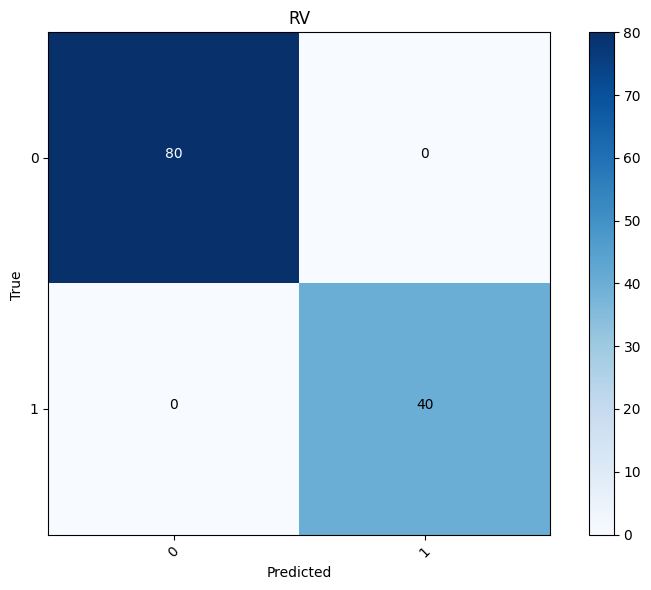

In [154]:

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("RV")
plt.colorbar()
tick_marks = np.arange(len(set(y_train)))
plt.xticks(tick_marks, sorted(set(y_train)), rotation=45)
plt.yticks(tick_marks, sorted(set(y_train)))
plt.xlabel('Predicted')
plt.ylabel('True ')

thresh = conf_matrix_train.max() / 2.
for i, j in np.ndindex(conf_matrix_train.shape):
    plt.text(j, i, format(conf_matrix_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_train[i, j] > thresh else "black")
plt.tight_layout()
plt.show()